In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location)
df

/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df2= df[['BEDRM','BATHRM','GBA','PRICE']].round()
df2.head()

,BEDRM,BATHRM,GBA,PRICE
0,4,4,2522.0,1095000.0
1,5,3,2567.0,NaN
2,5,3,2522.0,2100000.0
3,5,3,2484.0,1602000.0
4,3,2,5255.0,NaN


In [4]:
df2 = df2.dropna()

In [5]:
meanprice = df2['PRICE'].mean()
stdprice = df2['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf2= df2.copy()
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] > toprange].index)
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] < botrange].index)



In [6]:
from sklearn.linear_model import LinearRegression
X = copydf2.drop('PRICE', axis=1)
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
lm.fit(X, copydf2['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print('Estimated Intercept coefficient:', lm.intercept_) #all things being 0 price would still be $86,788.

Estimated Intercept coefficient: 86778.77646374924


In [9]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 3


In [10]:
pd.DataFrame(list(zip(X.columns,lm.coef_)), columns= ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,BEDRM,-16429.110110
1,BATHRM,110319.724894
2,GBA,147.315731


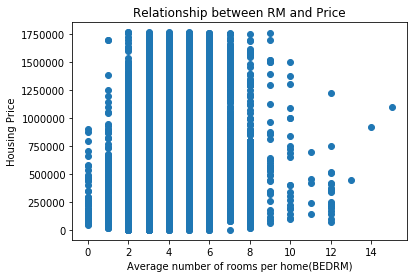

In [11]:
plt.scatter(copydf2.BEDRM, copydf2.PRICE)
plt.xlabel('Average number of rooms per home(BEDRM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')  
plt.show()

In [12]:
lm.predict(X)[0:5]

array([833871.50968933, 701524.67689988, 705726.58132021, 587656.42884297,
       765024.56921007])

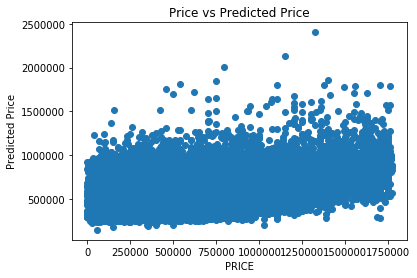

In [13]:
plt.scatter(copydf2.PRICE, lm.predict(X) )
plt.xlabel('PRICE')
plt.ylabel('Predicted Price')
plt.title('Price vs Predicted Price')  
plt.show()